In [212]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [213]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [214]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

#My dataset location "G:\SAGNIK GHOSH\IMDB\Movie+Assignment+Data.csv"

# Loading the dataset into movies dataframe

movies=pd.read_csv(r"G:\SAGNIK GHOSH\IMDB\Movie+Assignment+Data.csv")

In [215]:
# Displaying the top 10 data from the movies dataframe after reading the csv

movies.head(10)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
5,Hell or High Water,2016,12000000,27007844,Chris Pine,Jeff Bridges,Ben Foster,19000,12000.0,9000.0,...,7.6,7.4,7.6,7.6,7.7,7.3,7.9,7.5,R,USA
6,Doctor Strange,2016,165000000,232641920,Benedict Cumberbatch,Chiwetel Ejiofor,Rachel McAdams,19000,NaN,46000.0,...,7.4,7.7,7.5,7.4,7.8,7.1,7.6,7.4,PG-13,USA
7,Tangled,2010,260000000,200807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,7.5,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA
8,The Dark Knight Rises,2012,250000000,448130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA
9,Captain America: Civil War,2016,250000000,407197282,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000.0,11000.0,...,7.7,7.8,7.6,7.6,7.9,7.5,8.1,7.7,PG-13,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [216]:
# Check the number of rows and columns in the dataframe

# checking the shape of the dataframe movies 

movies.shape


(100, 62)

- The above dataframe contains `100 rows and 62 columns.`

In [217]:
# Check the column-wise info of the dataframe

# checking column wise information like how many null values it contain, how many not null values it contains , datatypes of columns etc., using info() commands. 

movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

- The above dataframe contains some **null** values in `actor_2_facebook_likes,actor_3_facebook_likes,genre_2,genre_3 and in MetaCritic` columns.

In [218]:
# Check the summary for the numeric columns 

# Checking the summary of data frame of nueric columns using describe () commands  like count,mean,standard daviation ,25%,50% etc. 

# Also checking all other statistical information for all 53 numeric columns 

movies.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


- Checking all other statistical information for all `53 numeric columns like counts, mean, min, max, standard daviation , 25% , 50% etc.`

## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [219]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

# using floordiv() commands to convert the column 'Gross' from '$' to 'million '$'

movies['Gross']=movies['Gross'].floordiv(1000000)

# using floordiv() commands to convert the column 'budget' from '$' to 'million '$'

movies['budget']=movies['budget'].floordiv(1000000)

# displaying the first 5 data from movies dataframe after the converting the '$' to 'million '$'.

movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30,151,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150,341,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12,51,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47,100,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9,47,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [220]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

# Substracting 'budget' from 'Gross' and store it to new 'profit' column

movies['profit']=movies['Gross']-movies['budget']

# displaying the first 5 data from movies dataframe after adding profit column.

movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,La La Land,2016,30,151,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121
1,Zootopia,2016,150,341,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191
2,Lion,2016,12,51,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39
3,Arrival,2016,47,100,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53
4,Manchester by the Sea,2016,9,47,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38


In [221]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'

# soring the dataframe in descending order and keeping inplace to true to change the original dataframe

movies.sort_values(by=['profit'],ascending=False,inplace=True)


In [222]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

# Extracting top 10 profitable movies using positional indexing 'iloc' method and store it ot new dataframe top10

top10=movies.iloc[0:10]

# displaying the first 10 data from movies dataframe for top10.

top10.head(10)


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691
11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305
32,The Hunger Games: Catching Fire,2013,130,424,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294
12,Toy Story 3,2010,200,414,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214
8,The Dark Knight Rises,2012,250,448,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198
45,The Lego Movie,2014,60,257,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197
1,Zootopia,2016,150,341,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191
41,Despicable Me,2010,69,251,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182
18,Inside Out,2015,175,356,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181


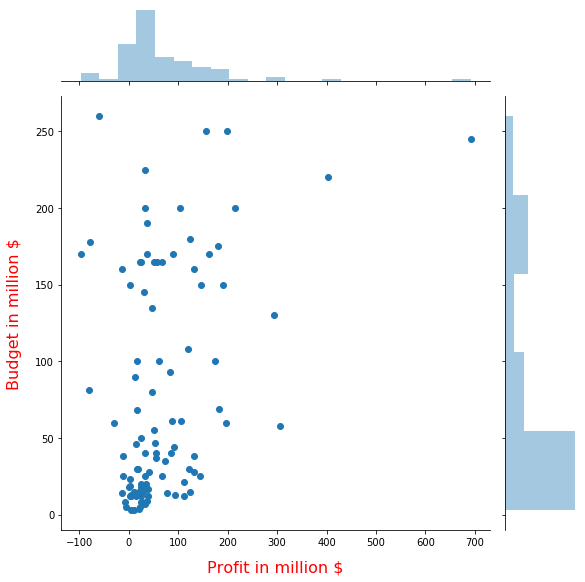

In [223]:
#Plot profit vs budget


# plotting the joint plot with default kind of scatter , making the height as 8 for better readability 

jntplot=sns.jointplot(x=movies['profit'],y=movies['budget'],height=8)

#setting the x and y axis label and formatting

jntplot.set_axis_labels('Profit in million $', 'Budget in million $', fontsize=16,color='r',labelpad=13)

#showing the plot

plt.show()


## Inferences about the above jointplot (Profit vs Budget)

- We can see that the even the `high budgeted movies incur losses.`
- There are some `movies with negative profit as well even for high budget.`
- There are some `movies with low budget and high profit as well.`


The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [224]:
#Find the movies with negative profit

neg_profit=movies[movies['profit']<0]

# Displaying the movies with negative profit

neg_profit

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
99,Tucker and Dale vs Evil,2010,5,0,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,440.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-5
89,Amour,2012,8,0,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8
56,Rush,2013,38,26,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-12
66,Warrior,2011,25,13,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-12
82,Flipped,2010,14,1,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-13
28,X-Men: First Class,2011,160,146,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-14
46,Scott Pilgrim vs. the World,2010,60,31,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-29
7,Tangled,2010,260,200,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-60
17,Edge of Tomorrow,2014,178,100,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-78
39,The Little Prince,2015,81,1,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-80


**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

**`Yes`** I can spot `Tangled` in the dataset with negative profit

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [225]:
# Change the scale of MetaCritic

# Change the metracritic rating column to scale of 10, using apply() and lambda function

movies['MetaCritic']=movies['MetaCritic'].apply(lambda x:x/10)

In [226]:
# Find the average ratings

# Finding the average of MetaCritic rating plus IMDd_rating and storing into new column Avg_rating

movies['Avg_rating']=(movies['MetaCritic'] + movies['IMDb_rating'])/2

#Displaying the first 5 rows to validate the new column added

movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691,8.10
11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403,7.50
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305,7.25
32,The Hunger Games: Catching Fire,2013,130,424,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294,7.60
12,Toy Story 3,2010,200,414,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214,8.75


In [227]:
#Sort in descending order of average rating

# Sorting the movies based on average rating , in descending order and by inplace to True

movies.sort_values(by=['Avg_rating'],ascending=False,inplace=True)

In [228]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of >8

# Extracting data based on metacritic-rating < 0.5 and also with the average rating of >8 using abs() and conditional extraction

UniversalAcclaim=movies[(abs(movies['MetaCritic'] - movies['IMDb_rating']) <0.5) & (movies['Avg_rating'] > 8)]

#Displaying the UniversalAcclaim movies

UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
95,Whiplash,2014,3,13,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,10,8.65
35,Django Unchained,2012,100,162,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62,8.25
93,Dallas Buyers Club,2013,5,27,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.0,896.0,...,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22,8.20
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691,8.10
3,Arrival,2016,47,100,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53,8.05


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

**`Yes`** I am able to spot `Star Wars` in the final dataset

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [229]:
# Write your code here

#Storing the movies dataframe to a new dataframe 'Top_5_trios' to find the top 5 trios,doing deepcopying so that if Top_5_trios change it will not effect movies

Top_5_trios=movies.iloc[:]

# Adding new column as 'actor_top_3_likes' to store the summation of facebook likes of 3 actors

Top_5_trios['Top_likes']=Top_5_trios['actor_1_facebook_likes']+Top_5_trios['actor_2_facebook_likes']+Top_5_trios['actor_3_facebook_likes']

# Sorting the values in descending order based on actor_top_3_likes and keep inplace to true 

Top_5_trios.sort_values(by=['Top_likes'],ascending=False,inplace=True)

# Extracting the actors names columns as list by using df.values.tolist() method and with iloc() to do a positional based indexing

Top_5_trios.iloc[0:5,4:7].values.tolist()

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**

    **Answer** -`3`
    

- **`Most popular trio after applying the condition:`**

   **Answer** - `'Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'`

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [230]:
# Your answer here (optional)

# Taking the top 5 trios in a new dataframe Top_trios

Top_trios=Top_5_trios.iloc[0:5,:]

#Extracting the top most trios from the above top 5 trios based on the given condition 

Top_most_trios=Top_trios[((Top_trios['actor_1_facebook_likes']>=Top_trios['actor_2_facebook_likes']/2) & (Top_trios['actor_1_facebook_likes']>=Top_trios['actor_3_facebook_likes']/2)) & ((Top_trios['actor_2_facebook_likes']>=Top_trios['actor_1_facebook_likes']/2) & (Top_trios['actor_1_facebook_likes']>=Top_trios['actor_3_facebook_likes']/2)) & ((Top_trios['actor_3_facebook_likes']>=Top_trios['actor_1_facebook_likes']/2) & (Top_trios['actor_1_facebook_likes']>=Top_trios['actor_2_facebook_likes']/2))]

# No. of trios that satisfy the above condition is 3:

print(Top_most_trios.shape[0])

# The top most trio is ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt']

print(Top_most_trios.iloc[0,4:7].values.tolist())

3
['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt']


- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

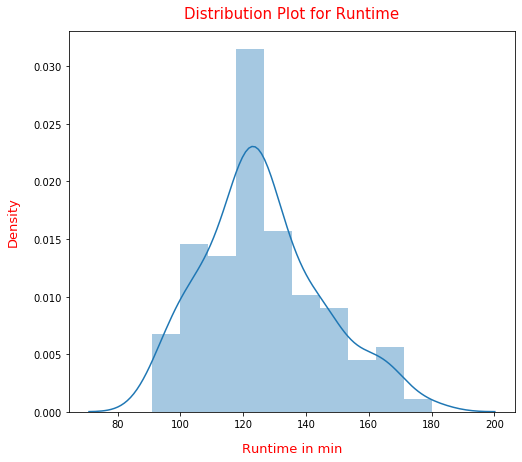

In [231]:
# Runtime histogram/density plot

# Ploting a density plot using distplot of seaborn, and we can see that most of the movies appear to be sharply 2 hours long

#setting the figure size

plt.figure(figsize=(8,7))

#ploting the distplot on runtime column

sns.distplot(movies['Runtime'])

#setting title and formating of the plot

plt.title('Distribution Plot for Runtime',fontsize=15,pad=13,color='r')

#setting x and y label of the plot and its formating

plt.xlabel('Runtime in min',fontsize=13,color='r',labelpad=13)
plt.ylabel('Density',fontsize=13,color='r',labelpad=13)

# showing the plot

plt.show()

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

**`Yes`** Most of the movies appear sharply 2 hour long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [232]:
# Write your code here

# Extracting movies with content rating 'R' rated and sort it by CVotesU18 in descending order, then extracting top 10

PopularR=movies[movies['content_rating']=='R'].sort_values(by=['CVotesU18'],ascending=False).head(10)

# Displaying the dataframe for PopularR

PopularR

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305,7.25
36,The Wolf of Wall Street,2013,100,116,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.6,7.5,7.8,8.1,8.1,R,USA,16,7.85
35,Django Unchained,2012,100,162,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.0,265.0,...,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62,8.25
29,Mad Max: Fury Road,2015,150,153,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.5,7.5,7.2,8.0,8.2,8.0,R,Australia,3,8.55
95,Whiplash,2014,3,13,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,10,8.65
31,The Revenant,2015,135,183,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.8,7.8,7.6,8.1,7.9,R,USA,48,7.80
40,Shutter Island,2010,80,127,Leonardo DiCaprio,Joseph Sikora,Nellie Sciutto,29000,223.0,163.0,...,7.5,7.4,7.6,7.6,7.8,8.1,R,USA,47,7.20
43,Gone Girl,2014,61,167,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106,8.00
65,The Grand Budapest Hotel,2014,25,59,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,...,7.8,7.8,7.9,7.7,8.1,8.0,R,USA,34,8.45
72,Birdman or (The Unexpected Virtue of Ignorance),2014,18,42,Emma Stone,Naomi Watts,Merritt Wever,15000,6000.0,529.0,...,7.2,7.3,7.0,7.1,7.9,7.7,R,USA,24,8.30


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

**`Yes`**, kids watching `Deadpool` a lot

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [233]:
# Create the dataframe df_by_genre

# created a new dataframe df_by_genre by combining two extracted dataframe for all genres and votes/cvotes using concat()

df_by_genre=pd.concat([(movies.loc[:,'genre_1':'genre_3']),(movies.loc[:,'CVotes10':'VotesnUS'])],axis=1)

# display first 5 rows of df_by_genre,total 47 columns are present 

df_by_genre.head()


,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
94,Drama,NaN,NaN,49673,62055,76838,52238,23789,10431,4906,...,7.8,7.8,7.8,7.6,7.7,7.7,7.7,7.2,8.0,7.9
69,Biography,Drama,History,75556,126223,161460,83070,27231,9603,4021,...,8.2,8.0,7.9,8.0,7.8,7.8,8.1,7.7,8.3,8.0
18,Animation,Adventure,Comedy,87509,113244,119801,67153,24210,8542,3349,...,8.3,8.1,8.1,8.1,7.9,7.9,7.9,7.6,8.2,8.1
12,Animation,Adventure,Comedy,139773,149992,158704,88289,31291,11850,4859,...,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3
4,Drama,NaN,NaN,18191,33532,46596,29626,11879,4539,1976,...,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8


In [234]:
# Create a column cnt and initialize it to 1

# adding cnt column and initialize it to one, and the dtype of the column is int64

df_by_genre['cnt']=1

In [235]:
# Group the movies by individual genres

# grouping first by genre_1 and then sum of numeric columns and store it in a new dataframe df_by_g1

df_by_g1=df_by_genre.groupby(by=['genre_1']).sum()

# grouping first by genre_2 and then sum of numeric columns and store it in a new dataframe df_by_g2

df_by_g2=df_by_genre.groupby(by=['genre_2']).sum()

# grouping first by genre_3 and then sum of numeric columns and store it in a new dataframe df_by_g3

df_by_g3=df_by_genre.groupby(by=['genre_3']).sum()


In [236]:
# Add the grouped data frames and store it in a new data frame

# adding 3 new dataframe df_by_g1, df_by_g2,df_by_g3 together and store it in a new dataframe  df_add.Doing fill_value to 0 so that no NaN appears if any columns missing from one datafarme

df_add=df_by_g1.add(df_by_g2,fill_value=0).add(df_by_g3,fill_value=0)

# display first 5 rows in grouped dataframe df_add

df_add.head()


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0


In [237]:
# Extract genres with atleast 10 occurences

#Extracting rows from df_add dataframe which has atleast 10 occurence or 10 cnt value

genre_top10=df_add[df_add['cnt']>=10]

# display first 5 rows in grouped dataframe genre_top10

genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0


In [238]:
# Take the mean for every column by dividing with cnt 

#Dividing the all numeric columns Cvotes and votes by cnt to find the mean and store it in the same dataframe using div()

genre_top10.iloc[:,:-1]=genre_top10.iloc[:,:-1].div(genre_top10['cnt'],axis=0)


In [239]:
# Rounding off the columns of Votes to two decimals

# Rounding off the Votes columns to 2 decimal place using round()

genre_top10.loc[:,'VotesM':'VotesnUS']=genre_top10.loc[:,'VotesM':'VotesnUS'].round(decimals=2)


In [240]:
# Converting CVotes to int type

# converting CVotes to int using astype('int') convert the CVotes to int

genre_top10[genre_top10.columns[0:27]]=genre_top10[genre_top10.columns[0:27]].astype('int')

# displaying the dataframe genre_top10 after all the operations on dataframe

genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,5524,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,4575,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,2290,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,2849,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,3842,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,3383,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,3250,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,3082,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,6731,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,4433,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

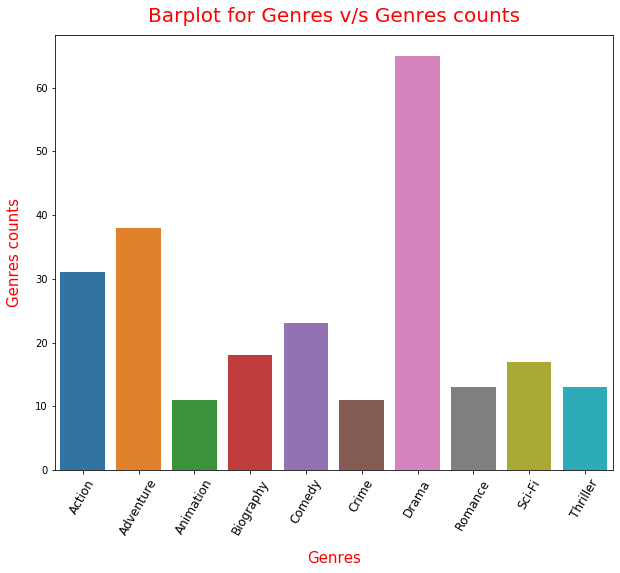

In [241]:
# Countplot for genres

# Setting the figure size 

plt.figure(figsize=(10,8))

#setting the title of the barplot

plt.title('Barplot for Genres v/s Genres counts',color='r',fontsize=20,pad=13)

# Ploting a barplot from seaborn to see the insights of data for genres vs cnt  

sns.barplot(x=genre_top10.index,y=genre_top10['cnt'])

# setting the xlabel of the plot and setting the ylabel of the plot

plt.xlabel('Genres',fontsize=15,color='r',labelpad=13)

plt.ylabel('Genres counts',fontsize=15,color='r',labelpad=13)

#setting the xticks for rotation and fontsize for better readability

plt.xticks(rotation=60,fontsize=12)

#showing the plot

plt.show()


**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

**`Yes`** `Drama` is the tallest

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

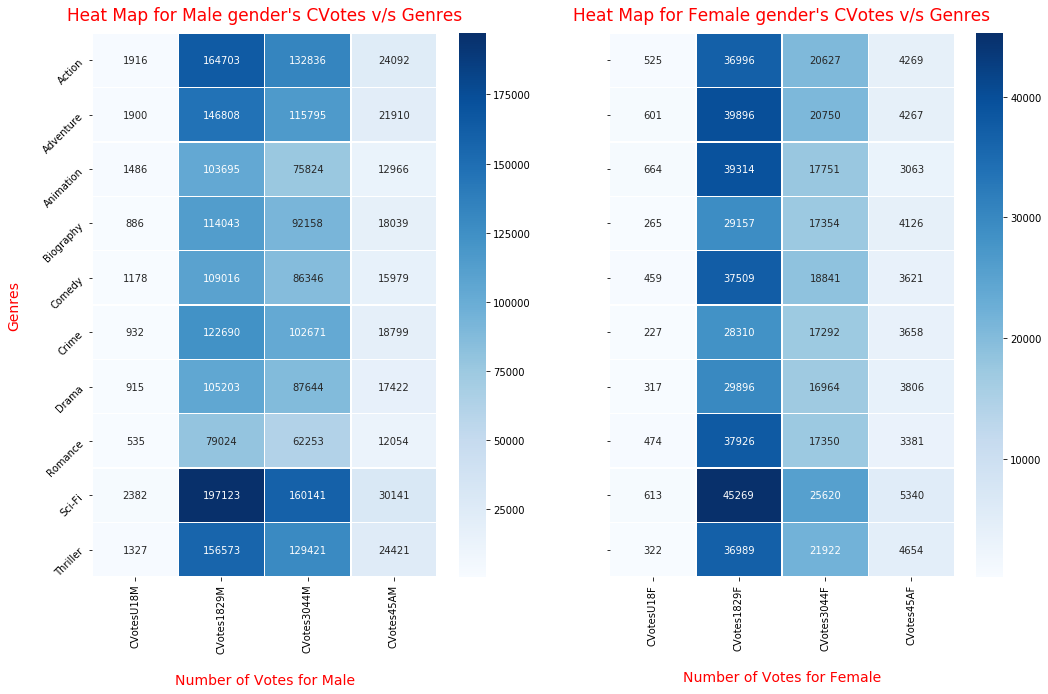

In [242]:
# 1st set of heat maps for CVotes-related columns

# mentioning the axis (rows,columns) for subplot and sharing the y axis between subplots

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(17,10),sharey=True)

#plotting the heatmap in first column for male gender CVotes and genres

hmap1=sns.heatmap(genre_top10[['CVotesU18M','CVotes1829M','CVotes3044M','CVotes45AM']],cmap='Blues',annot=True,fmt='d',linewidth=.5,ax=ax1)

#Setting title of the heat map for male CVotes

hmap1.set_title("Heat Map for Male gender's CVotes v/s Genres",color='r',fontsize=17,pad=13)

#plotting the heatmap in first column for female gender CVotes and genres

hmap2=sns.heatmap(genre_top10[['CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF']],cmap='Blues',annot=True,fmt='d',linewidth=.5,ax=ax2)

#Setting title of the heat map for Female CVotes

hmap2.set_title("Heat Map for Female gender's CVotes v/s Genres",color='r',fontsize=17,pad=13)

# getting the ytickslabel(Genres) from the heat map for male/female genres

ticksl = ax1.get_yticklabels()

# setting  the ytickslabel(Genres) from the heat map for male/female genres and rotating it to 45 degree

ax1.set_yticklabels(ticksl, rotation=45)

# getting the xtickslabel(CVotesM) from the heat map for male CVotes

ticksl = ax1.get_xticklabels()

# setting  the xtickslabel (CVotesM) from the heat map for male CVotes and rotating it to 90 degree

ax1.set_xticklabels(ticksl, rotation=90)

# getting the xtickslabel(CVotesF) from the heat map for female CVotes

ticks2 = ax2.get_xticklabels()

# setting  the xtickslabel (CVotesF) from the heat map for female CVotes and rotating it to 90 degree

ax2.set_xticklabels(ticks2, rotation=90)

#setting both xlabels for both female and male CVotes

ax2.set_xlabel("Number of Votes for Female",fontsize=14,color='r',labelpad=20)
ax1.set_xlabel("Number of Votes for Male",fontsize=14,color='r',labelpad=20)

#setting both ylabels for both female and male genres ,as this axis is sharing among two

ax1.set_ylabel("Genres",fontsize=14,color='r',labelpad=20)

#showing the heap map plot

plt.show()


**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1**: `CVotes`(Number of votes) for the age group `18-29 for both male and female are high` with repect to other age groups for all types of movie genres
- **Inference 2**: `CVotes`(Number of votes) for the age group `under 18 and above 45` for both `male and female` are `very low` with repect to other age groups for all types of movie genres 
- **Inference 3**: For Genres `Romance` for `age group male under 18` has `lowest CVotes`(Number of votes) while for Genres `Crime` for `age group female under 18` has `lowest CVotes`(Number of votes).

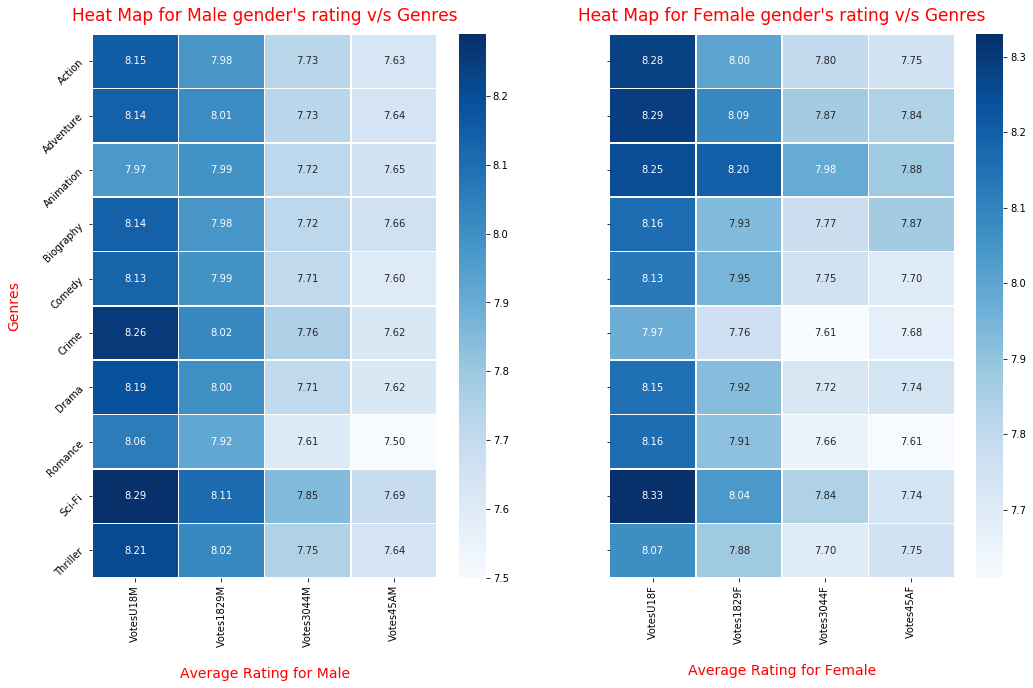

In [243]:
# 2nd set of heat maps for Votes-related columns


# mentioning the axis (rows,columns) for subplot and sharing the y axis between subplots

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(17,10),sharey=True)

#plotting the heatmap in first column for male gender CVotes and genres

hmap1=sns.heatmap(genre_top10[['VotesU18M','Votes1829M','Votes3044M','Votes45AM']],cmap='Blues',annot=True,fmt='.2f',linewidth=.5,ax=ax1)

#Setting title of the heat map for male CVotes

hmap1.set_title("Heat Map for Male gender's rating v/s Genres",color='r',fontsize=17,pad=13)

#plotting the heatmap in first column for female gender Votes and genres

hmap2=sns.heatmap(genre_top10[['VotesU18F','Votes1829F','Votes3044F','Votes45AF']],cmap='Blues',annot=True,fmt='.2f',linewidth=.5,ax=ax2)

#Setting title of the heat map for Female Votes

hmap2.set_title("Heat Map for Female gender's rating v/s Genres",color='r',fontsize=17,pad=13)

# getting the ytickslabel(Genres) from the heat map for male/female genres

ticksl = ax1.get_yticklabels()

# setting  the ytickslabel(Genres) from the heat map for male/female genres and rotating it to 45 degree

ax1.set_yticklabels(ticksl, rotation=45)

# getting the xtickslabel(VotesM) from the heat map for male Votes

ticksl = ax1.get_xticklabels()

# setting  the xtickslabel (VotesM) from the heat map for male Votes and rotating it to 90 degree

ax1.set_xticklabels(ticksl, rotation=90)

# getting the xtickslabel(VotesF) from the heat map for female Votes

ticks2 = ax2.get_xticklabels()

# setting  the xtickslabel (VotesF) from the heat map for female Votes and rotating it to 90 degree

ax2.set_xticklabels(ticks2, rotation=90)

#setting both xlabels for both female and male CVotes

ax2.set_xlabel("Average Rating for Female",fontsize=14,color='r',labelpad=20)
ax1.set_xlabel("Average Rating for Male",fontsize=14,color='r',labelpad=20)

#setting both ylabels for both female and male genres ,as this axis is sharing among two

ax1.set_ylabel("Genres",fontsize=14,color='r',labelpad=20)

#showing the heap map plot

plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1**:`Average rating`(Votes) for Genres `Romance` for `age group above 45` for both `male and female` is `low` with respect all other genres.Age group above `45 doesn't like romance` it seems.
- **Inference 2**:`Accross Genres for age group under 18 for both male and female` has given `high Average rating`(Votes) with respect to all other age groups for both male and female.
- **Inference 3**:`Accross Genres for age group above 45 for both male and female` has given `lowest Average rating`(Votes) with respect to all other age groups for both male and female.

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [244]:
# Creating IFUS column

# Creating new IFUS column based on country 'USA' using apply()

movies['IFUS']=movies['Country'].apply(lambda x : 'USA' if x=='USA' else 'non-USA')


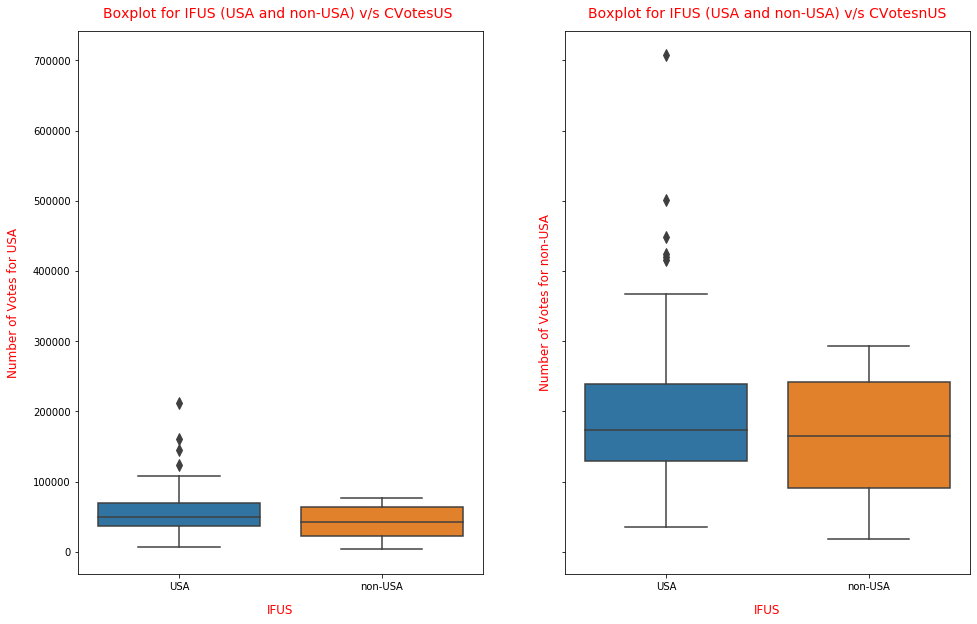

In [245]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)


# mentioning the axis (rows,columns) for subplot and sharing the y axis between subplots

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,10),sharey=True)

#doing boxplot between CVotesUS vs IFUS categorized between USA and non-USA

boxplt1=sns.boxplot(data=movies,x='IFUS',y='CVotesUS',ax=ax1,fliersize=8)

#doing boxplot between CVotesnUS vs IFUS categorized between USA and non-USA

boxplt2=sns.boxplot(data=movies,x='IFUS',y='CVotesnUS',ax=ax2,fliersize=8)

#setting the title of the two boxplots

boxplt1.set_title("Boxplot for IFUS (USA and non-USA) v/s CVotesUS ",color='r',fontsize=14,pad=12.7)
boxplt2.set_title("Boxplot for IFUS (USA and non-USA) v/s CVotesnUS",color='r',fontsize=14,pad=12.7)

#settings the y and xlabels for the two barplots

boxplt1.set_ylabel('Number of Votes for USA',color='r',fontsize=12,labelpad=12.7)
boxplt2.set_ylabel('Number of Votes for non-USA',color='r',fontsize=12,labelpad=12.7)
boxplt1.set_xlabel('IFUS',color='r',fontsize=12,labelpad=12.7)
boxplt2.set_xlabel('IFUS',color='r',fontsize=12,labelpad=12.7)

#showing the boxplots

plt.show()

**`Inferences:`** Write your two inferences/observations below:
- **Inference 1**: We can observed that `number of votes (CVotesUS and CVotesnUS) for both USA people and non-USA people, for US movies contains some outliers` means `there are higher variations on the voting for both USA people and non-USA people, for US movies only, when compared to non-USA movies`.

- **Inference 2**: We can observed that the `upper fence of the boxplot for number of votes (CVotesUS and CVotesnUS) for both USA people and non-USA people,  for USA movies is higher when compared to non-USA movies` this means that `both USA people and non-USA people has given maximum number of votes to USA movies than non-USA movies`.

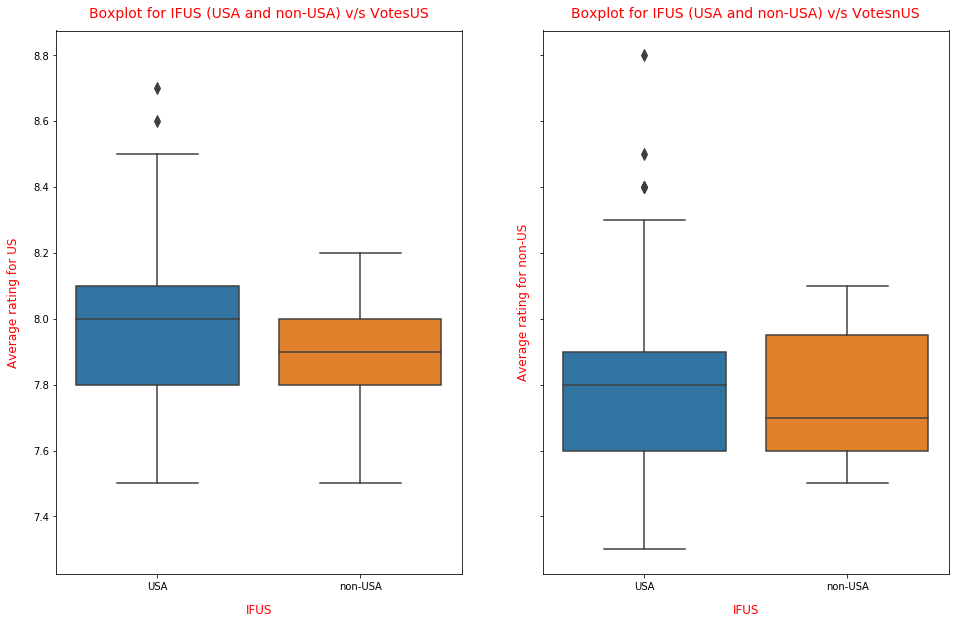

In [246]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

#mentioning the axis (rows,columns) for subplot and sharing the y axis between subplots

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,10),sharey=True)

#doing boxplot between VotesUS vs IFUS categorized between USA and non-USA

boxplt1=sns.boxplot(data=movies,x='IFUS',y='VotesUS',ax=ax1,fliersize=8)

#doing boxplot between VotesnUS vs IFUS categorized between USA and non-USA

boxplt2=sns.boxplot(data=movies,x='IFUS',y='VotesnUS',ax=ax2,fliersize=8)

#setting the title of the two boxplots

boxplt1.set_title("Boxplot for IFUS (USA and non-USA) v/s VotesUS",color='r',fontsize=14,pad=12.7)
boxplt2.set_title("Boxplot for IFUS (USA and non-USA) v/s VotesnUS",color='r',fontsize=14,pad=12.7)

#settings the y and xlabels for the two barplots

boxplt1.set_ylabel('Average rating for US',color='r',fontsize=12,labelpad=12.7)
boxplt2.set_ylabel('Average rating for non-US',color='r',fontsize=12,labelpad=12.7)
boxplt1.set_xlabel('IFUS',color='r',fontsize=12,labelpad=12.7)
boxplt2.set_xlabel('IFUS',color='r',fontsize=12,labelpad=12.7)

#showing the boxplot

plt.show()

**`Inferences:`** Write your two inferences/observations below:
- **Inference 1**: We can observed that `Average Ratings (VotesUS and VotesnUS) for both USA people and non-USA people, for US movies contains some outliers` means `there are higher variations on the average ratings for both USA people and non-USA people, for US movies only, when compared to non-USA movies`.

- **Inference 2**: We can observed that the `upper fence of the boxplot for Average Ratings (VotesUS and VotesnUS) for both USA people and non-USA people,  for USA movies is higher, when compared to non-USA movies` this means that `both USA people and non-USA people has given maximum ratings to USA movies than non-USA movies`.

   Even we can observed here that the `lower fence of the boxplot for Average Ratings (VotesnUS) for non-USA people, for USA movies is much lower, when compared to average ratings for USA movies given by USA people` this means that `non-USA people has given much lower ratings as well to USA movies than USA people for USA movies`.


-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [247]:
# Sorting by CVotes1000

# Sorting genre_top10 dataframe by CVotes1000 in descending order 

genre_top10.sort_values(by=['CVotes1000'],ascending=False,inplace=True)


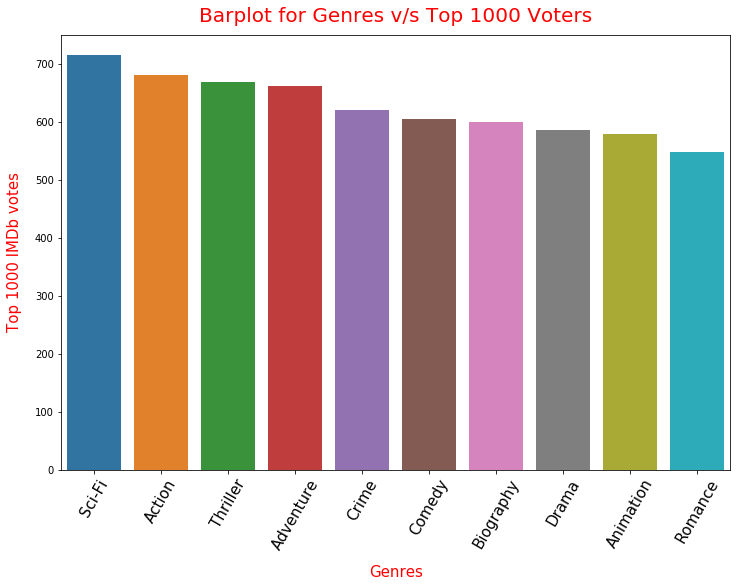

In [248]:
# Bar plot

# initializing the figure size 

plt.figure(figsize=(12,8))

# Giving the title of the barplot 

plt.title('Barplot for Genres v/s Top 1000 Voters',color='r',fontsize=20,pad=12.7)

# Doing the barplot from seaborn library between genres and CVotes1000

sns.barplot(x=genre_top10.index,y=genre_top10['CVotes1000'])

#Giving the xlabel for the plot

plt.xlabel('Genres',fontsize=15,color='r',labelpad=12.7)

# Giving the ylabel for the plot

plt.ylabel('Top 1000 IMDb votes',fontsize=15,color='r',labelpad=12.7)

#Rotating the xticks to 60 degree and fotzise to 15  for better readability

plt.xticks(rotation=60,fontsize=15)

# showing the barplot

plt.show()

**`Inferences:`** Write your inferences/observations here.
- **Inference 1**: Genres `Sci-Fi` if most popular among the top 1000 IMDb voters. Even for the heatmap that we have ploted earlier (CVotesM/F vs Genres)  depicted the same inference that is,  the `Sci-Fi` is most popular among CVoters irrespective of gender in age group 18-29.

- **Inference 2** : By comaring the previous `heatmap that we have ploted earlier (CVotesM/F vs Genres)` and this barplot , and as `Sci-Fi` is most popular among CVoters irrespective of gender in age group 18-29, `we can depict one inference that IMDb 1000 voters is mostly lies in age group 18-29` irrespective of genders.


**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

**`Yes`**`Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.